# SRC and HCK Interaction Analysis Pipeline

### 1. Library Imports and Setup

In [1]:
import main as main

### 2. Data loading and complexome analysis for each bait

In [2]:
# Human SRC
filepath = "input/human_src_data.csv"
output_path = "output/human_src_data.csv"
df_raw= main.read_csv_file(filepath, header=0)
species, bait = main.extract_species_bait(filepath)
print(f"Species : {species} , Bait: {bait}")
bait_conc = main.get_bait_concentration(df_raw, filepath)
df = main.calculate_Kapp(df_raw)
df = main.calculate_complexome(df,filepath)
df = main.log_scale(df)
main.save_csv_file(df, output_path)

# Human HCK
filepath = "input/human_hck_data.csv"
output_path = "output/human_hck_data.csv"
df_raw= main.read_csv_file(filepath, header=0)
species, bait = main.extract_species_bait(filepath)
print(f"Species : {species} , Bait: {bait}")
bait_conc = main.get_bait_concentration(df_raw, filepath)
df = main.calculate_Kapp(df_raw)
df = main.calculate_complexome(df,filepath)
df = main.log_scale(df)
main.save_csv_file(df, output_path)

# Mouse SRC
filepath = "input/mouse_src_data.csv"
output_path = "output/mouse_src_data.csv"
df_raw= main.read_csv_file(filepath, header=0)
species, bait = main.extract_species_bait(filepath)
print(f"Species : {species} , Bait: {bait}")
bait_conc = main.get_bait_concentration(df_raw, filepath)
df = main.calculate_Kapp(df_raw)
df = main.calculate_complexome(df,filepath)
df = main.log_scale(df)
main.save_csv_file(df, output_path)

# Mouse HCK
filepath = "input/mouse_hck_data.csv"
output_path = "output/mouse_hck_data.csv"
df_raw= main.read_csv_file(filepath, header=0)
species, bait = main.extract_species_bait(filepath)
print(f"Species : {species} , Bait: {bait}")
bait_conc = main.get_bait_concentration(df_raw, filepath)
df = main.calculate_Kapp(df_raw)
df = main.calculate_complexome(df,filepath)
df = main.log_scale(df)
main.save_csv_file(df, output_path)

File input/human_src_data.csv loaded successfully.
Species : Human , Bait: SRC
✅File saved to output/human_src_data.csv.
File input/human_hck_data.csv loaded successfully.
Species : Human , Bait: HCK
✅File saved to output/human_hck_data.csv.
File input/mouse_src_data.csv loaded successfully.
Species : Mouse , Bait: SRC
✅File saved to output/mouse_src_data.csv.
File input/mouse_hck_data.csv loaded successfully.
Species : Mouse , Bait: HCK
✅File saved to output/mouse_hck_data.csv.


### 3. Merge dataframe for comparative analysis

In [3]:
file_list = ["output/human_src_data.csv", "output/human_hck_data.csv", "output/mouse_src_data.csv", "output/mouse_hck_data.csv"]  # adjust paths if needed
output_path = "output/merged.csv"

df_merged = main.merge_files(file_list, output_path)
df = main.calculate_deltapKapp(df_merged)
df = main.calculate_complexome_difference(df)
df = main.log_delta(df)
df = main.calculate_intraspecies_log_complexome_ratio(df)
df= main.group_columns_by_species(df)
main.save_csv_file(df, output_path)

File output/human_src_data.csv loaded successfully.
File output/human_hck_data.csv loaded successfully.
File output/mouse_src_data.csv loaded successfully.
File output/mouse_hck_data.csv loaded successfully.
✅ Fichier combiné sauvegardé : output/merged.csv
✅File saved to output/merged.csv.


### 4. Visualize the data

##### 
- Venn diagrams : Number of significant binding partners.

File output/merged.csv loaded successfully.


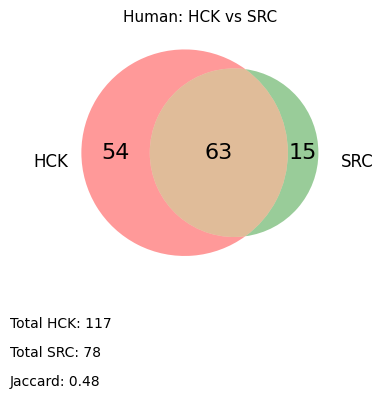

✅ Saved intra-species Venn: output/venn_diagrams/Human_HCK_vs_SRC.png


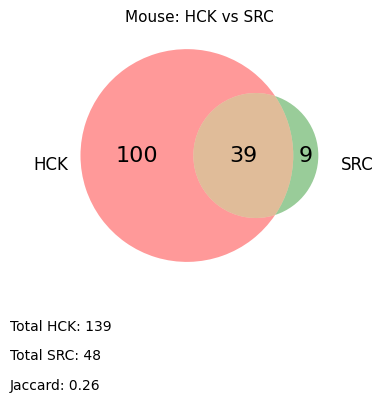

✅ Saved intra-species Venn: output/venn_diagrams/Mouse_HCK_vs_SRC.png


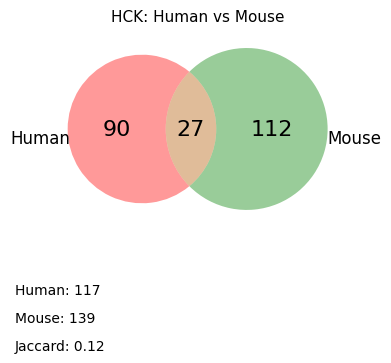

✅ Saved inter-species Venn: output/venn_diagrams/HCK_Human_vs_Mouse.png


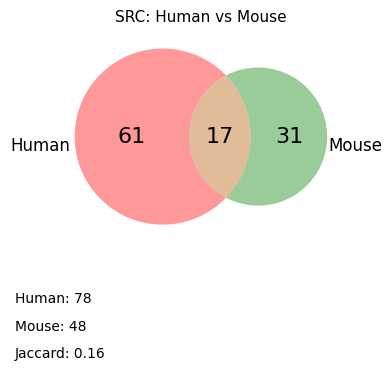

✅ Saved inter-species Venn: output/venn_diagrams/SRC_Human_vs_Mouse.png


In [4]:
df_path = "output/merged.csv"
df = main.read_csv_file(df_path, header=[0, 1, 2])
output= "output/venn_diagrams"

df = main.plot_venn_diagram(df, output)

##### 
- Plots showing the evolution of complexe formation depending on affinity and availability of binding partners.

File output/merged.csv loaded successfully.

🔍 Plotting: Human - HCK Complexome Analysis
✅ Figure saved: output/complexome_analysis/Human_HCK_Complexome_Analysis.png


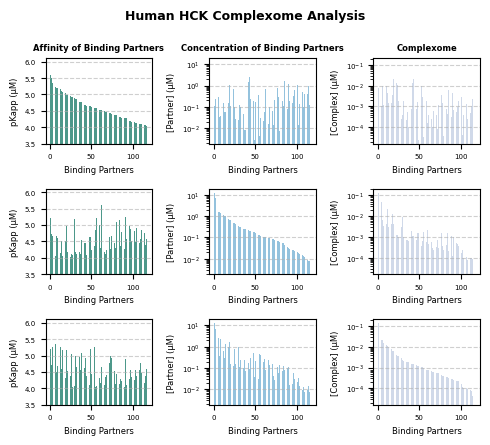


🔍 Plotting: Human - SRC Complexome Analysis
✅ Figure saved: output/complexome_analysis/Human_SRC_Complexome_Analysis.png


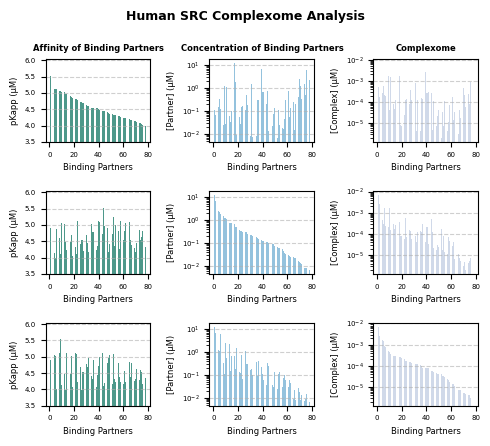


🔍 Plotting: Mouse - HCK Complexome Analysis
✅ Figure saved: output/complexome_analysis/Mouse_HCK_Complexome_Analysis.png


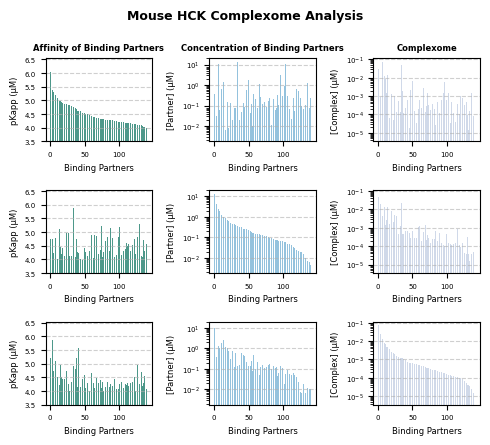


🔍 Plotting: Mouse - SRC Complexome Analysis
✅ Figure saved: output/complexome_analysis/Mouse_SRC_Complexome_Analysis.png


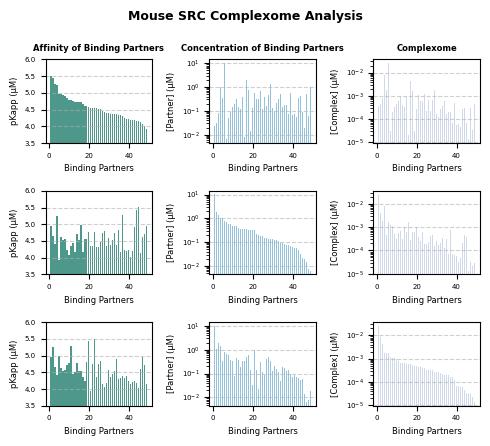

In [5]:
# Plots showing the evolution of complexe formation # Load the DataFrame properly
df_path = "output/merged.csv"
df = main.read_csv_file(df_path, header=[0, 1, 2])  # MultiIndex columns expected

# Define output directory
output = "output/complexome_analysis"

# Now call the function
main.plot_complexome_analysis(df, output)

##### 
- Linear Regrassion Plots for comparative analysis

File output/merged.csv loaded successfully.


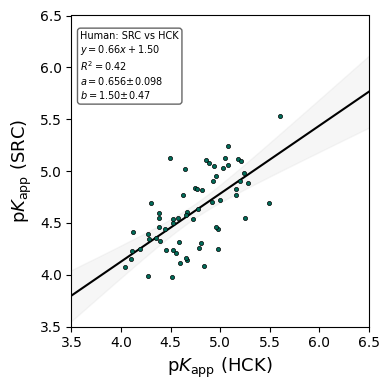

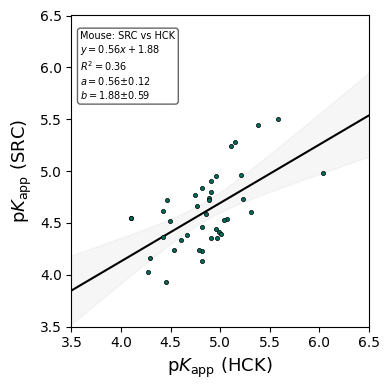

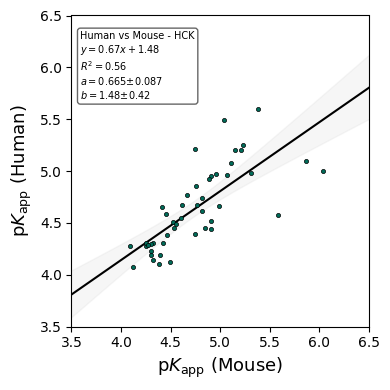

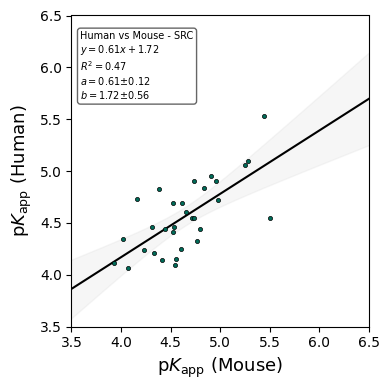

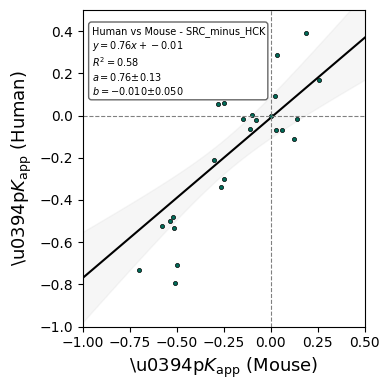

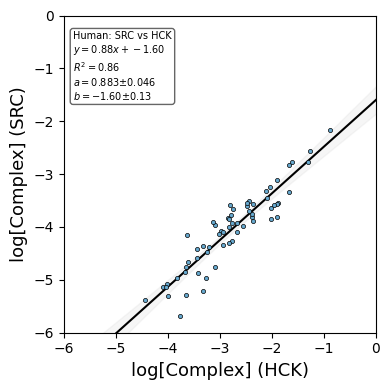

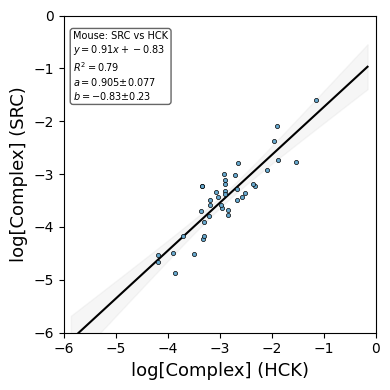

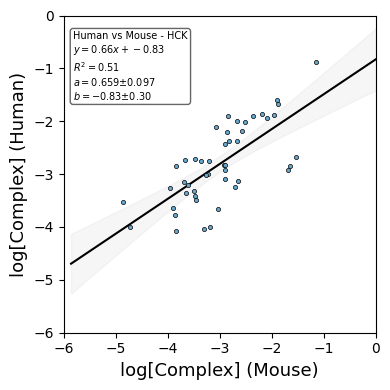

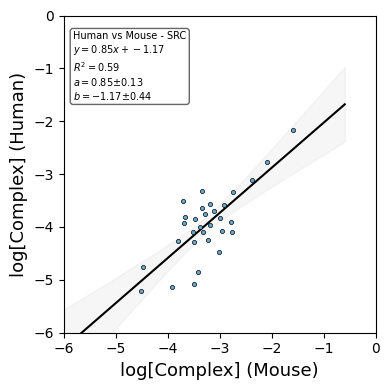

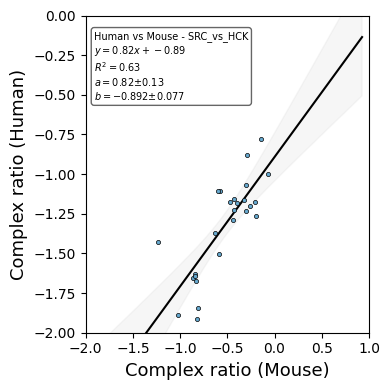

✅ All plots generated and saved successfully.


In [6]:
df_path = "output/merged.csv"
df = main.read_csv_file(df_path, header=[0, 1, 2])  

# Define output directory
output = "output/Linear_regression"

df = main.analyze_and_plot_correlation(df, annotate_genes=False)